In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_excel('F://MTcars.xlsx')

In [3]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df_m = df.iloc[:,1:]
df_m.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Discriptive Statistics:

In [5]:
df_corr = df_m.corr()

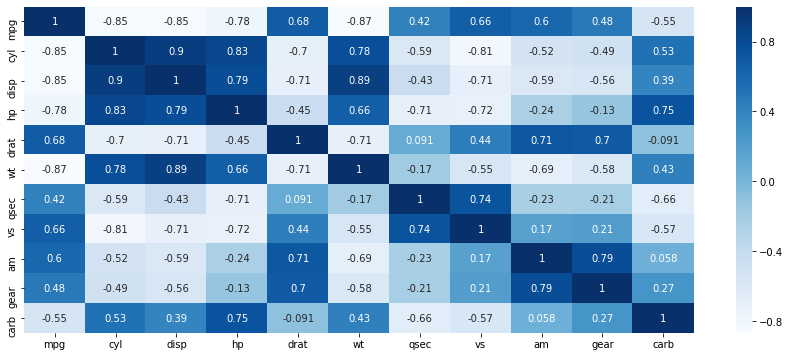

In [24]:
plt.figure(figsize=(15,6))
sns.heatmap(data=df_corr, annot=True, cmap='Blues')
plt.show()

In [13]:
df_m.keys()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [34]:
import statsmodels.formula.api as smf

In [15]:
df_m.keys()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [21]:
model = smf.ols(formula="mpg~cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb",data=df_m)

In [17]:
result= model.fit()

In [18]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           3.79e-07
Time:                        11:59:14   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

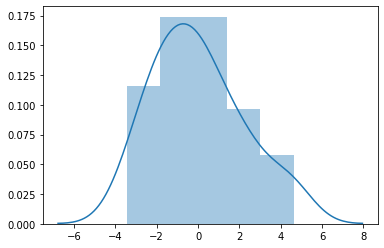

In [19]:
sns.distplot(result.resid)

In [26]:
from scipy.stats import shapiro

In [28]:
shapiro(result.resid)

(0.9569438099861145, 0.2261517345905304)

## Normality Test using Kolmogorov Smirnov Test

In [44]:
import statsmodels.api as sm

In [45]:
sm.stats.diagnostic.kstest_normal(result.resid)

(0.0962659308170084, 0.2)

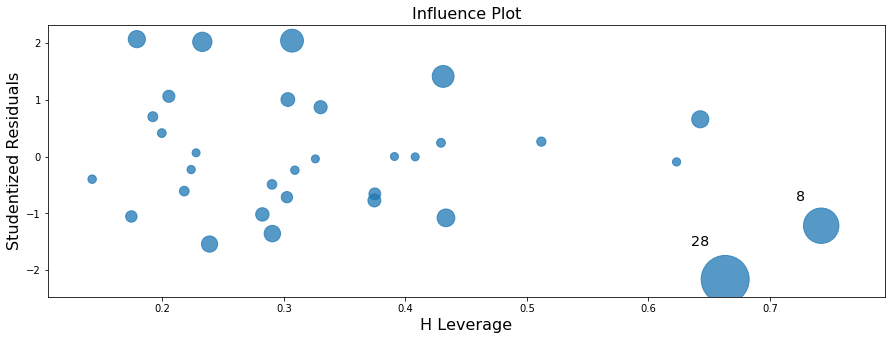

In [49]:
fig,ax=plt.subplots(figsize=(15,5))
fig= sm.graphics.influence_plot(result,ax=ax)

In [50]:
# cook dist

In [51]:
influ= result.get_influence()

In [53]:
cook= influ.summary_frame()

In [54]:
cook.head()

,dfb_Intercept,dfb_cyl,dfb_disp,dfb_hp,dfb_drat,dfb_wt,dfb_qsec,dfb_vs,dfb_am,dfb_gear,dfb_carb,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.080228,0.006263,-0.096634,0.260049,0.035485,0.109069,-0.015734,0.098621,-0.139736,0.166814,-0.258558,0.020591,-0.722666,0.302506,-0.475921,-0.714186,-0.470336
1,0.005233,-0.032293,-0.009781,0.141320,0.003009,0.013676,-0.046659,0.090681,-0.129349,0.086761,-0.126009,0.009218,-0.497990,0.290221,-0.318437,-0.488884,-0.312614
2,-0.247818,0.138020,0.299453,-0.305427,0.187003,-0.385911,0.273358,-0.190640,-0.371231,0.102704,0.406685,0.063524,-1.492373,0.238817,-0.835922,-1.540379,-0.862811
3,0.005588,0.001455,0.016242,-0.010723,-0.014652,-0.013039,-0.000431,0.020993,0.002689,-0.001693,0.008046,0.000131,0.069815,0.227739,0.037913,0.068140,0.037003
4,-0.014887,0.021888,0.101726,-0.041145,0.000176,-0.119867,0.042664,-0.028774,-0.040920,0.013145,0.021098,0.004083,0.424509,0.199512,0.211930,0.416067,0.207716


In [55]:
cook[cook['cooks_d']>0.07]

,dfb_Intercept,dfb_cyl,dfb_disp,dfb_hp,dfb_drat,dfb_wt,dfb_qsec,dfb_vs,dfb_am,dfb_gear,dfb_carb,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
8,1.262168,0.024100,-0.261514,-0.528019,-0.270571,0.569092,-1.595053,0.937837,0.402562,-0.560833,-0.170668,0.379221,-1.203440,0.742287,-2.042407,-1.217158,-2.065688
16,0.042949,-0.306089,-0.194892,0.232490,0.321412,0.775226,-0.284323,0.001930,0.233030,-0.166346,-0.320729,0.146126,1.906196,0.306696,1.267827,2.045632,1.360567
17,-0.210755,0.250954,-0.305074,0.165293,0.077265,0.308822,0.115694,0.115471,0.572144,-0.068193,-0.349207,0.073564,1.926840,0.178951,0.899556,2.072513,0.967564
19,-0.559200,0.350960,0.102398,0.112296,0.198279,-0.309908,0.668368,-0.047175,0.563002,-0.160094,0.028861,0.098603,1.890244,0.232872,1.041459,2.024985,1.115697
20,-0.423459,0.594281,0.058435,-0.442764,0.014321,0.170986,0.080276,0.229916,0.370141,0.473530,-0.070330,0.080262,-1.074316,0.433414,-0.939615,-1.078480,-0.943257
27,0.510202,-0.311708,0.260460,-0.049323,-0.660403,-0.255737,-0.399801,0.344780,-0.249819,0.423347,-0.032684,0.131687,1.382606,0.431098,1.203560,1.415235,1.231964
28,1.503137,-1.325047,-0.008347,-0.533554,-1.262859,-0.291202,-0.195539,-0.456579,-0.093574,-1.659405,1.394678,0.713521,-1.996242,0.663252,-2.801558,-2.164273,-3.037375
30,-0.118138,-0.025933,0.043536,0.308497,-0.220918,-0.210341,0.245869,0.079969,0.183225,-0.028747,0.262369,0.073091,0.668479,0.642757,0.896663,0.659422,0.884515


In [64]:
df_new= df.drop(labels=[8,28])
df_new = df_new.iloc[:,1:]

In [67]:
model1 = smf.ols(formula="mpg~cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb",data=df_new).fit()

In [68]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     17.66
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           1.41e-07
Time:                        12:33:41   Log-Likelihood:                -61.628
No. Observations:                  30   AIC:                             145.3
Df Residuals:                      19   BIC:                             160.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.8799     27.330     -1.496      0.151     -98.082      16.322
cyl            1.1954      1.097      1.090      0.289      -1.100       3.491
disp           0.0186      0.016      1.140      0.269      -0.016       0.053
hp             0.0024      0.022      0.109      0.914      -0.043       0.048
drat           3.2659      1.737      1.880      0.076      -0.371       6.902
wt            -4.3730      1.880     -2.326      0.031      -8.308      -0.438
qsec           2.2449      1.085      2.070      0.052      -0.025       4.515
vs            -0.9337      2.397     -0.390      0.701      -5.950       4.083
am             1.7923      1.939      0.924      0.367      -2.266       5.851
gear           3.9677      1.818      2.182      0.042       0.162       7.774
carb          -1.1574      0.885     -1.307      0.207      -3.010       0.696
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.899
Skew:                           0.245   Prob(JB):                        0.638
Kurtosis:                       2.308   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
model1_1 = smf.ols(formula="mpg~cyl+disp+drat+wt+qsec+am+gear+carb",data=df_new).fit()

In [70]:
model1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     24.18
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           6.21e-09
Time:                        12:44:38   Log-Likelihood:                -61.749
No. Observations:                  30   AIC:                             141.5
Df Residuals:                      21   BIC:                             154.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.2898     23.177     -1.609      0.123     -85.490      10.910
cyl            1.3251      0.996      1.330      0.198      -0.747       3.397
disp           0.0180      0.014      1.274      0.217      -0.011       0.047
drat           3.2398      1.600      2.024      0.056      -0.089       6.568
wt            -4.1158      1.659     -2.481      0.022      -7.566      -0.666
qsec           1.9831      0.782      2.536      0.019       0.357       3.609
am             2.0540      1.735      1.184      0.250      -1.554       5.662
gear           3.8715      1.690      2.291      0.032       0.357       7.386
carb          -1.2073      0.702     -1.721      0.100      -2.666       0.252
==============================================================================
Omnibus:                        0.745   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.789
Skew:                           0.217   Prob(JB):                        0.674
Kurtosis:                       2.335   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""